# Advanced ML I : Smart Predictive Maintenance for Industrial Equipment


**Project Description**: In this project, we will build a predictive maintenance system for industrial machinery. The goal is to predict machine failures before they occur, optimizing maintenance schedules and reducing downtime. This project will integrate key machine learning techniques covered in the course, such as ensemble learning, handling imbalanced data, reinforcement learning, and automated machine learning (AutoML), to deliver an effective and scalable solution

**Objectives:**
1. Predict Equipment Failures: Develop a machine learning model that predicts equipment failure based on sensor data.
2. Handle Imbalanced Data: Address the challenge of imbalanced datasets, where machine failures are rare events compared to normal
operation.
3. Optimize Maintenance Scheduling: Use reinforcement learning to optimize maintenance schedules, minimizing downtime and costs.
4. Automate Model Selection: Utilize AutoML to automate the process of selecting the best-performing model and tuning hyper-
parameters

## Step 1: Problem Definition and Dataset Exploration

* Goal: Predict whether a machine will fail within a certain time window based on historical sensor data and operational metrics.
* Dataset: Use a synthetic or real-world dataset from industrial sensors. Common features include temperature, vibration levels,
pressure, and other operational conditions.
* Example datasets: NASA’s Turbofan Engine Degradation Dataset, PHM (Prognostics and Health Management) Challenge datasets

**Tasks:**
1. Explore the dataset to understand the distribution of features and identify potential correlations.
2. Visualize the class imbalance between machine failure events (rare) and normal operations (common).

**Competencies:**
* Exploratory Data Analysis (EDA): Visualization of data using pandas, matplotlib, and seaborn
* Handling Imbalanced Data: Understanding the imbalance in failure vs. normal data

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/behrad3d/nasa-cmaps/versions/1


In [10]:
import os

path_to_cmaps = os.path.join(path, 'CMaps')

# List the contents of the CMaps directory
cmaps_files = os.listdir(path_to_cmaps)

# Print the list of files and folders in CMaps
for file in cmaps_files:
    print(file)

RUL_FD002.txt
test_FD001.txt
RUL_FD001.txt
RUL_FD003.txt
Damage Propagation Modeling.pdf
RUL_FD004.txt
train_FD001.txt
train_FD004.txt
readme.txt
test_FD003.txt
train_FD003.txt
train_FD002.txt
test_FD002.txt
test_FD004.txt
x.txt


In [11]:
# Show content of readme.txt
readme_path = path + "/CMaps/readme.txt"
with open(readme_path, 'r', encoding="latin") as file:
    print(file.read())

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine  i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. Th

In [12]:
import pandas as pd

path_to_txt = os.path.join(path, 'CMaps/train_FD001.txt')
df = pd.read_csv(path_to_txt, delimiter=" ", header=None)

# Define the column names
columns = [
    "Unit", "Time", "OS1", "OS2", "OS3", "SM1", "SM2", "SM3", "SM4", "SM5", 
    "SM6", "SM7", "SM8", "SM9", "SM10", "SM11", "SM12", "SM13", "SM14", 
    "SM15", "SM16", "SM17", "SM18", "SM19", "SM20", "SM21", "SM22", "SM23"
]

# Assign the column names to the dataframe
df.columns = columns

# Now, the dataframe df has renamed columns
df.head()

,Unit,Time,OS1,OS2,OS3,SM1,SM2,SM3,SM4,SM5,...,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,SM22,SM23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


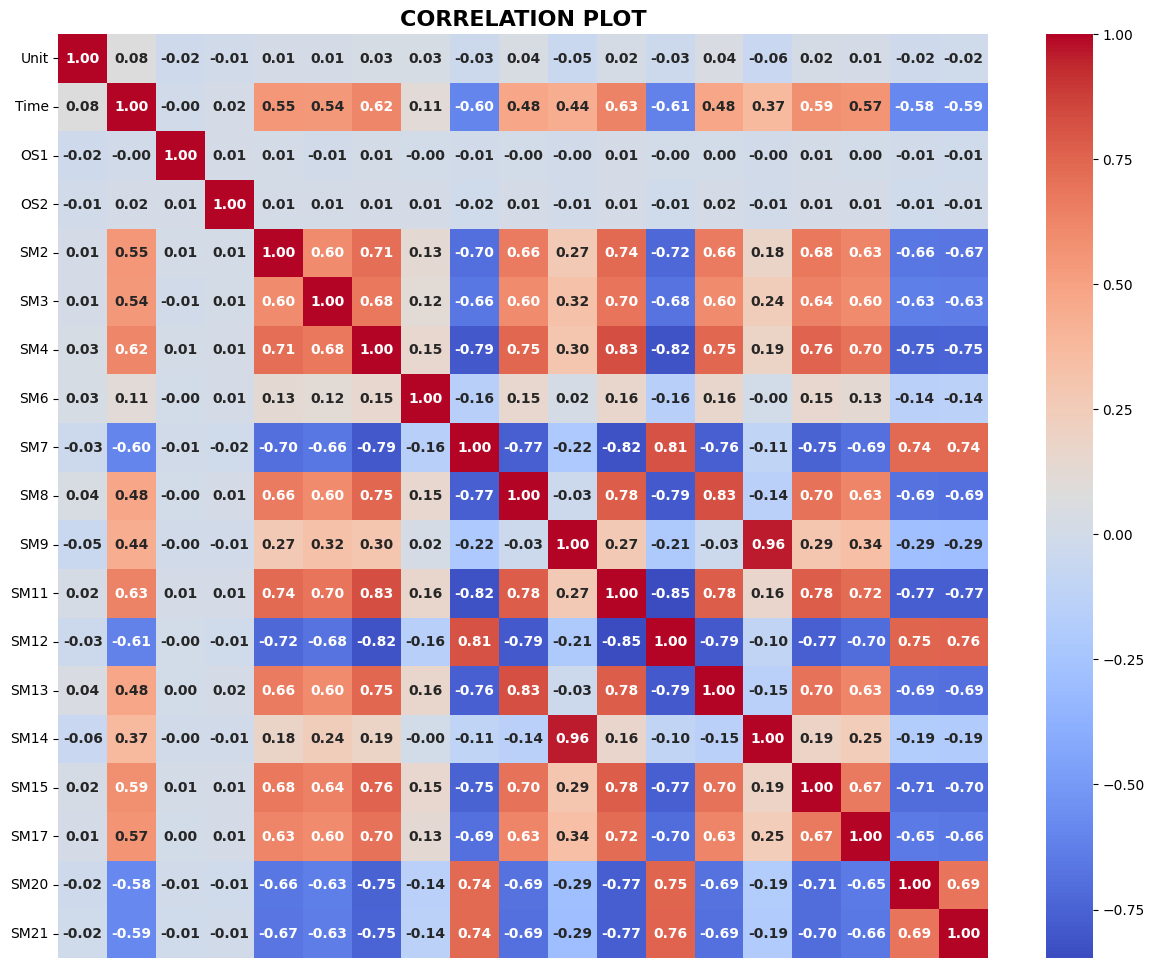

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
cleaned_corr = corr.dropna(axis=0, how="all").dropna(axis=1, how="all")
plt.figure(figsize=(15, 12))
sns.heatmap(cleaned_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10, "fontweight" :"bold"}, xticklabels=False)
plt.title('CORRELATION PLOT', fontsize=16, fontweight = "bold")
plt.xlabel("")
plt.yticks(rotation = 0)
plt.show()

In [13]:
unit1 = df[df["Unit"] == 1]
plt.plot(unit1)

NameError: name 'plt' is not defined